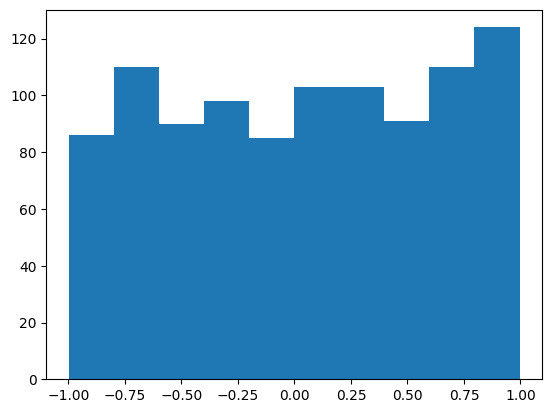

In [17]:
from samplers import get_data_sampler, UniformSampler

set_of_xs = []
data_sampler = UniformSampler(1)
data = data_sampler.sample_xs(1, 1000, 1).squeeze().squeeze()
import matplotlib.pyplot as plt

plt.hist(data)
plt.show()

In [18]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


torch.Size([100000, 10, 1])
tensor([[-0.0393,  0.2016,  1.7643],
        [-0.7356, -3.0275, -2.4835]])
torch.Size([100000, 10])
torch.Size([1000000])


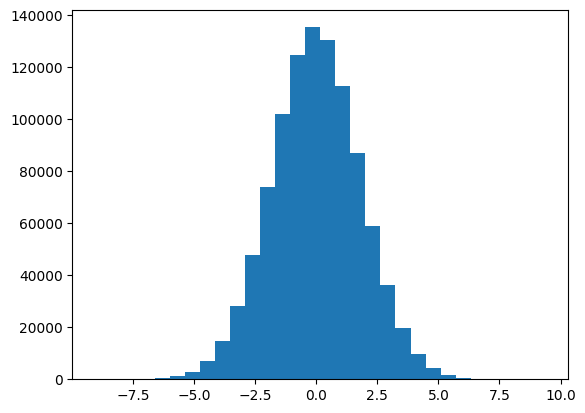

In [21]:
from tasks import PolynomialSharedRoots, ChebyshevKernelLinearRegression
data =  data_sampler.sample_xs(10, 100000, 1)
#task = PolynomialSharedRoots(n_dims=1, batch_size=100000, basis_dim=1, degree=5)
task = ChebyshevKernelLinearRegression(n_dims=1, batch_size=100000, basis_dim=5,lowest_degree=5, highest_degree=5)
print(data.shape)
ys = task.evaluate(data).squeeze()
print(ys[:2,:3])
print(ys.shape)
ys = ys.reshape(-1)
print(ys.shape)
plt.hist(ys, bins=30)
plt.show()

torch.Size([100000, 20, 1])


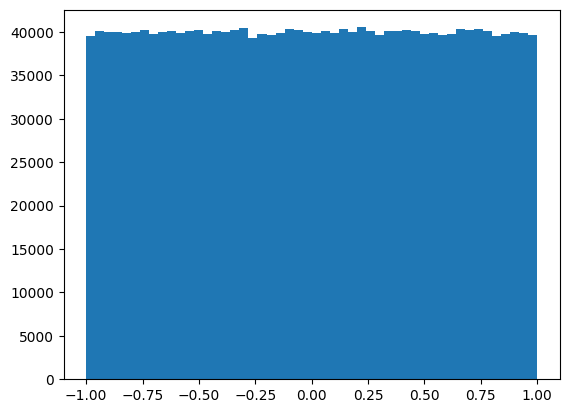

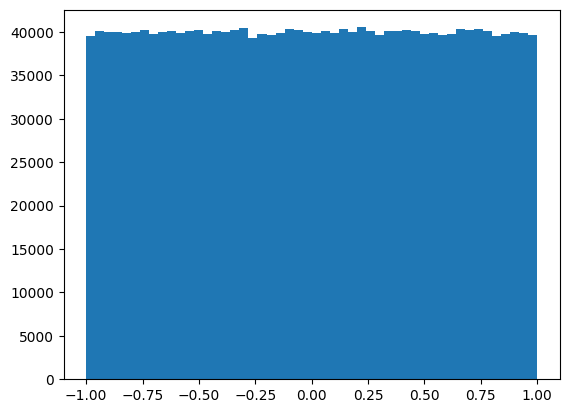

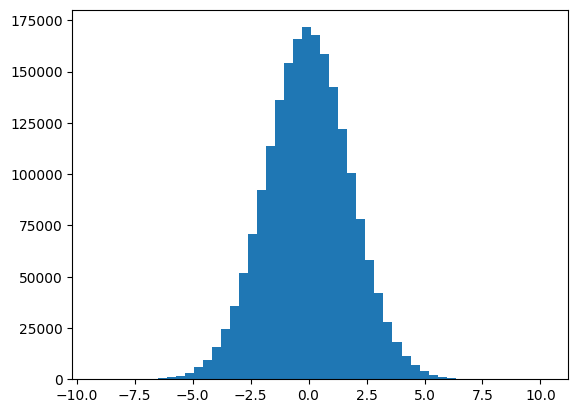

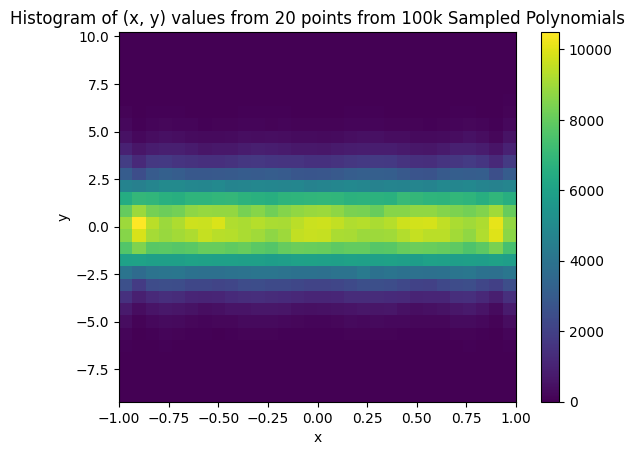

In [23]:
from tasks import get_task_sampler, ChebyshevKernelLinearRegression
data =  data_sampler.sample_xs(20, 100000, 1)
#task = PolynomialSharedRoots(n_dims=1, batch_size=100000, basis_dim=1, degree=5)
task = ChebyshevKernelLinearRegression(n_dims=1, batch_size=100000, basis_dim=5,lowest_degree=5, highest_degree=5)
print(data.shape)
ys = task.evaluate(data).squeeze()
ys = ys.reshape(-1)
data = data.reshape(-1)
plt.hist(data, bins=50)
plt.show()
data = data.numpy()
ys = ys.numpy()
plt.hist(data, bins=50)
plt.show()
plt.hist(ys, bins=50)
plt.show()
selected_ys = ys[data < 0.5]
selected_data = data[data < 0.5]
fig = plt.figure()
ax = fig.add_subplot(111)
counts,xedges,yedges,img = ax.hist2d(data,ys, bins=[30,30])
plt.xlabel("x")
plt.ylabel("y")
plt.title("Histogram of (x, y) values from 20 points from 100k Sampled Polynomials")
plt.xlim([-1, 1])
plt.colorbar(img)
plt.show()